## Kaggle challenge first delivery

In [1]:
#https://www.kaggle.com/spencerpitts/european-hotel-reviews-r
#https://www.kaggle.com/gunnvant/what-do-reviews-say

In [2]:
#Installer les librairies (Utile seulement la première fois !)
##install.packages("devtools")
#install.packages("RColorBrewer")
#devtools::install_github("hadley/tidyverse")
#install.packages("tidytext")
#install.packages("viridis")  # Installer

#Charger les librairies
library("viridis")           
library(RColorBrewer)
library(tidyverse)
library(lubridate)
library(stringr)
library(forcats)
library(tidytext)
#library(sqldf)
#library(plotly)
#library(leaflet)
#library(leaflet.extras)
library(ggplot2)
#library(wordcloud2)
#library(tm)

Warning message:
"le package 'viridis' a été compilé avec la version R 4.1.3"
Le chargement a nécessité le package : viridisLite

Warning message:
"le package 'viridisLite' a été compilé avec la version R 4.1.3"
-- Attaching packages -------------------------------------------------------------------------- tidyverse 1.3.1.9000 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

Warning message:
"le package 'ggplot2' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'tibble' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'tidyr' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'readr' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'purrr' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'dplyr' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'forcats' a été compilé avec la v

In [3]:
dataset = read.csv("D:/CoursSI4/Data Valo/Hotel_Reviews.csv")

In [4]:
# check for if any null values are present in which columns
sapply(dataset, function(x)sum(is.na(x)))


Hotel_Address 
                                         0 
              Additional_Number_of_Scoring 
                                         0 
                               Review_Date 
                                         0 
                             Average_Score 
                                         0 
                                Hotel_Name 
                                         0 
                      Reviewer_Nationality 
                                         0 
                           Negative_Review 
                                         0 
         Review_Total_Negative_Word_Counts 
                                         0 
                   Total_Number_of_Reviews 
                                         0 
                           Positive_Review 
                                         0 
         Review_Total_Positive_Word_Counts 
                                         0 
Total_Number_of_Reviews_Reviewer_Has_Given 
                                         0 
                            Reviewer_Score 
                                         0 
                                      Tags 
                                         0 
                         days_since_review 
                                         0 
                                       lat 
                                      3268 
                                       lng 
                                      3268

In [5]:
head(summary(as.factor(dataset$Reviewer_Nationality)), n = 1) # getting top Nationality for na's


United Kingdom  
          245246

In [6]:
# can only run once without getting lat & lng errors!
dataset <- dataset %>%
  select(colnames(dataset), -lat,-lng, -Review_Total_Negative_Word_Counts, -Review_Total_Positive_Word_Counts, -Additional_Number_of_Scoring) %>%
  mutate(Positive_Review = ifelse(is.na(Positive_Review),
                                  "Nothing",
                                  Positive_Review)) %>%
  mutate(Negative_Review = ifelse(is.na(Negative_Review),
                                  "Nothing",
                                  Negative_Review))
sapply(dataset, function(x)sum(is.na(x)))
# good no more NAs!

Hotel_Address 
                                         0 
                               Review_Date 
                                         0 
                             Average_Score 
                                         0 
                                Hotel_Name 
                                         0 
                      Reviewer_Nationality 
                                         0 
                           Negative_Review 
                                         0 
                   Total_Number_of_Reviews 
                                         0 
                           Positive_Review 
                                         0 
Total_Number_of_Reviews_Reviewer_Has_Given 
                                         0 
                            Reviewer_Score 
                                         0 
                                      Tags 
                                         0 
                         days_since_review 
                                         0

In [7]:
dataset <- dataset %>%
  mutate(Review_Date = lubridate::mdy(Review_Date))
#summary(df)
# Time Series Analysis
# is the score dependent on time of year?
dataset <- dataset %>%
  mutate(Year = year(Review_Date)) %>%
  mutate(Month = month(Review_Date))
# credit to fellow kaggle user, GunnvantSaini
dataset <- dataset %>%
  mutate(Country = sapply(str_split(Hotel_Address," "),function(x){x[length(x)]}))

In [8]:
# subsetting out lengthy columns, keeping hotel address and review data if
# needed to join
dataset_nlp <- dataset %>%
  select(Hotel_Name, Country, Review_Date, Year, Month,
         Total_Number_of_Reviews_Reviewer_Has_Given, Negative_Review, Reviewer_Nationality,
         Positive_Review,Total_Number_of_Reviews_Reviewer_Has_Given, Tags, Reviewer_Score)
dataset_clean <- dataset %>%
  select(Hotel_Name, Country, Review_Date, Year, Month, Average_Score,
         Reviewer_Nationality,Reviewer_Score,Total_Number_of_Reviews_Reviewer_Has_Given, Negative_Review,
         Positive_Review)
print("Our dataset cleaned:" )
head(dataset_clean)
print("First column of NLP:" )
head(dataset_nlp, n = 1)

[1] "Our dataset cleaned:"


Hotel_Name  Country     Review_Date Year Month Average_Score
1 Hotel Arena Netherlands 2017-08-03  2017 8     7.7          
2 Hotel Arena Netherlands 2017-08-03  2017 8     7.7          
3 Hotel Arena Netherlands 2017-07-31  2017 7     7.7          
4 Hotel Arena Netherlands 2017-07-31  2017 7     7.7          
5 Hotel Arena Netherlands 2017-07-24  2017 7     7.7          
6 Hotel Arena Netherlands 2017-07-24  2017 7     7.7          
  Reviewer_Nationality Reviewer_Score
1  Russia              2.9           
2  Ireland             7.5           
3  Australia           7.1           
4  United Kingdom      3.8           
5  New Zealand         6.7           
6  Poland              6.7           
  Total_Number_of_Reviews_Reviewer_Has_Given
1 7                                         
2 7                                         
3 9                                         
4 1                                         
5 3                                         
6 1                                         
  Negative_Review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1  I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin your holiday So we had to wait till 13 00 in order to check in my new room what a wonderful waist of my time The r

[1] "First column of NLP:"


Hotel_Name  Country     Review_Date Year Month
1 Hotel Arena Netherlands 2017-08-03  2017 8    
  Total_Number_of_Reviews_Reviewer_Has_Given
1 7                                         
  Negative_Review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1  I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin your holiday So we had to wait till 13 00 in order to check in my new room what a wonderful waist of my time The room 023 i got was just as i wanted to peaceful internal garden view big window We were tired from waiting the room so we placed our belongings and rushed to the city In the evening it turned out that there was a constant noise in the room i guess it was made by vibrating vent tubes or something it was constant and annoying as hell AND it did not stop even at 2 am making it hard to fall asleep for me and my wife I have an audio recording that i can not attach here but if you want i can send it via e mail The next day the technician came but was not able to determine the cause of the disturbing sound so i was offered to change the room once again the hotel was fully booked and they had only 1 room left the one that was smaller but seems newer 
  Reviewer_Nationality Positive_Review                                   
1  Russi

In [23]:
#dataset_clean
#ind=which(is.na(dataset_clean$Reviewer_Nationality))
#data_model=dataset_clean[-ind,]"""

dataset_clean$tourist=ifelse(dataset_clean$Reviewer_Nationality==dataset_clean$Country,"Yes","No")
dataset_clean$tourist=as.factor(dataset_clean$tourist)
table(dataset_clean$tourist)
#dataset_clean%>%group_by(Country,tourist)%>%summarise(average_score=mean(Average_Score))
#%>%ungroup()%>%mutate(Average_Score=average_score**7)%>%ggplot(aes(x=Country,y=Average_Score,color=tourist,fill=tourist))+geom_bar(stat='identity',position='dodge')+xlab("Country")+ylab("Average Score")+scale_y_continuous(breaks = NULL)



    No 
515738 

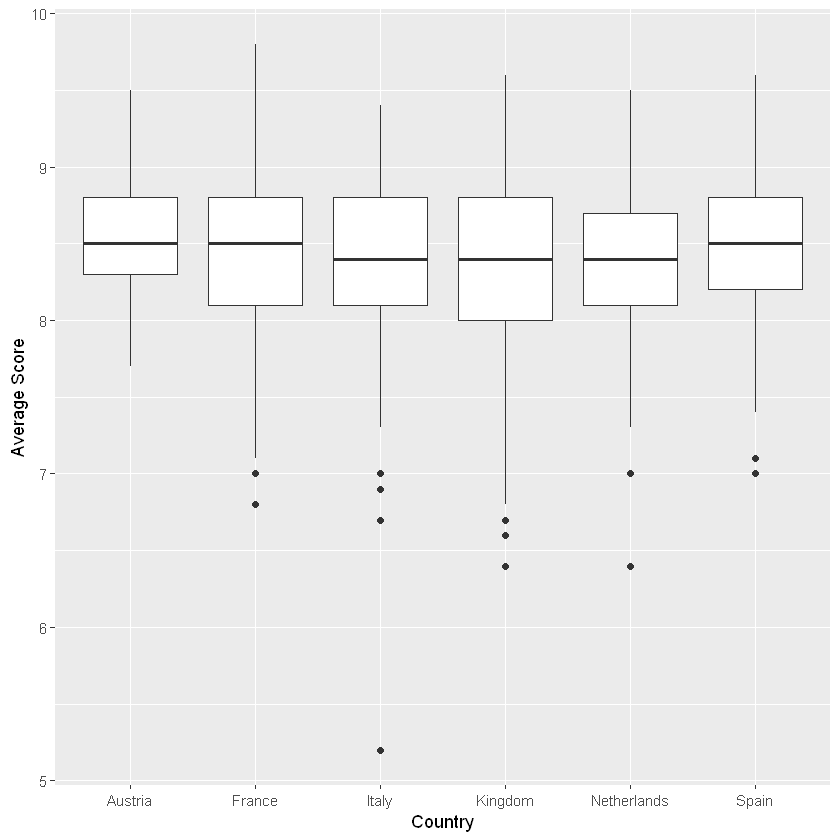

In [10]:
dataset_clean%>%ggplot(aes(x=as.factor(Country),y=Average_Score))+geom_boxplot()+xlab("Country")+ylab("Average Score")

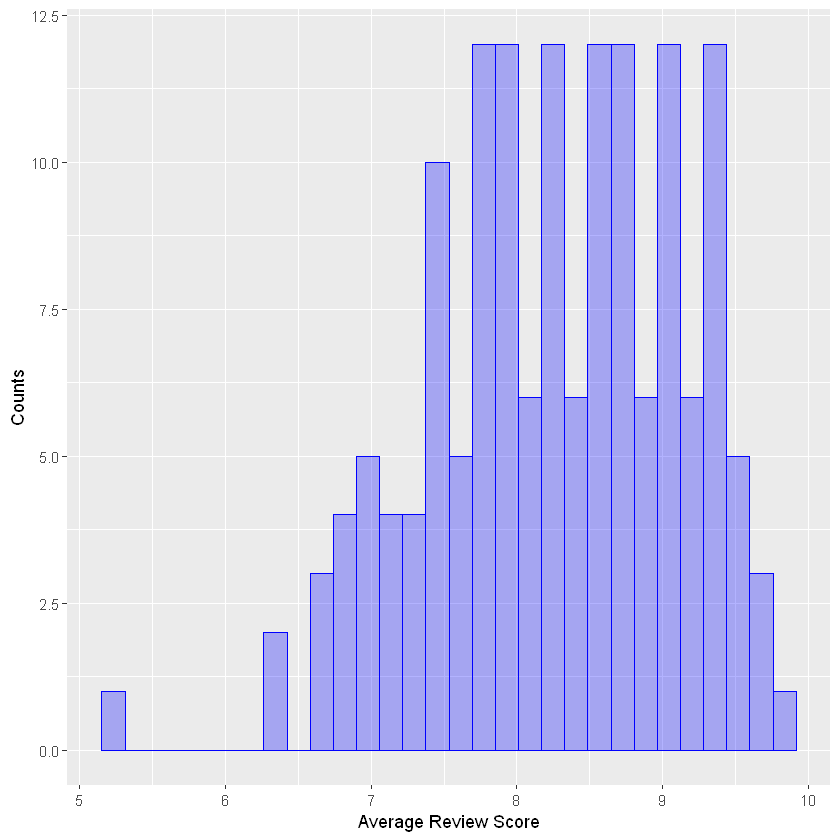

In [10]:
dataset_clean%>%select(Average_Score,Country)%>%distinct(Average_Score,Country)%>%ggplot(aes(x=Average_Score))+geom_histogram(color='blue',fill='blue',alpha=0.3,bins=30)+xlab("Average Review Score")+ylab("Counts")

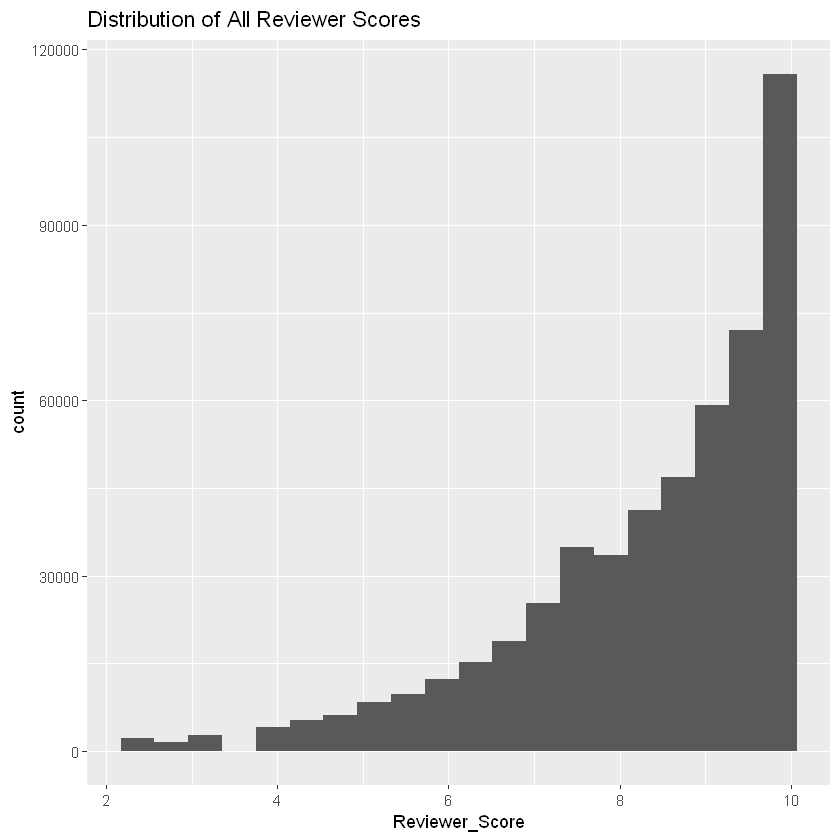

In [14]:
ggplot(dataset_clean, aes(Reviewer_Score))+
  geom_histogram(bins = 20) +
  ggtitle("Distribution of All Reviewer Scores")

In [15]:

#plot_world_cloud
reviews <- dataset_clean[sample(nrow(dataset_clean), 40000), ]
reviews <- reviews[reviews$Positive_Review!='Nothing',]
reviews <- reviews[reviews$Negative_Review!='Nothing',]
term_freq <- function(dataset_clean,sent){
  if(sent=='pos'){
    corpus <- Corpus(VectorSource(dataset_clean$Positive_Review))
  }else{
    corpus <- Corpus(VectorSource(dataset_clean$Negative_Review))
  }
  corpus <- tm_map(corpus, removeWords, stopwords("SMART"))
  corpus <- tm_map(corpus, removeWords, stopwords("en"))
  corpus <- tm_map(corpus, stripWhitespace)
  dtm <-TermDocumentMatrix(corpus)
  mat_dtm <- as.matrix(dtm)
  v_dtm <- sort(rowSums(mat_dtm),decreasing = TRUE)
  FreqMat <- data.frame(word = names(v_dtm), Freq = v_dtm)
  FreqMat <- FreqMat[1:50,]
  return(FreqMat)
}

In [16]:

wordcloud2(data = term_freq(reviews,'neg'),minRotation = 0,maxRotation = 0)

ERROR: Error in wordcloud2(data = term_freq(reviews, "neg"), minRotation = 0, : impossible de trouver la fonction "wordcloud2"


In [17]:

dataset_country <- dataset %>%
  select(Hotel_Name, Country, Review_Date, Year, Month,
         Total_Number_of_Reviews_Reviewer_Has_Given, Negative_Review, Reviewer_Nationality,
         Positive_Review,Total_Number_of_Reviews_Reviewer_Has_Given, Tags, Reviewer_Score)
data = subset(dataset_country, Country == c("Austria"))
#plot_world_cloud
reviews <- data[sample(nrow(data), 4000), ]
reviews <- reviews[reviews$Positive_Review!='Nothing',]
reviews <- reviews[reviews$Negative_Review!='Nothing',]
term_freq <- function(data,sent){
  if(sent=='pos'){
    corpus <- Corpus(VectorSource(data$Positive_Review))
  }else{
    corpus <- Corpus(VectorSource(data$Negative_Review))
  }
  corpus <- tm_map(corpus, removeWords, stopwords("SMART"))
  corpus <- tm_map(corpus, removeWords, stopwords("en"))
  corpus <- tm_map(corpus, stripWhitespace)
  dtm <-TermDocumentMatrix(corpus)
  mat_dtm <- as.matrix(dtm)
  v_dtm <- sort(rowSums(mat_dtm),decreasing = TRUE)
  FreqMat <- data.frame(word = names(v_dtm), Freq = v_dtm)
  FreqMat <- FreqMat[1:50,]
  return(FreqMat)
}
wordcloud2(data = term_freq(reviews,'pos'),minRotation = 0,maxRotation = 0)

ERROR: Error in wordcloud2(data = term_freq(reviews, "pos"), minRotation = 0, : impossible de trouver la fonction "wordcloud2"


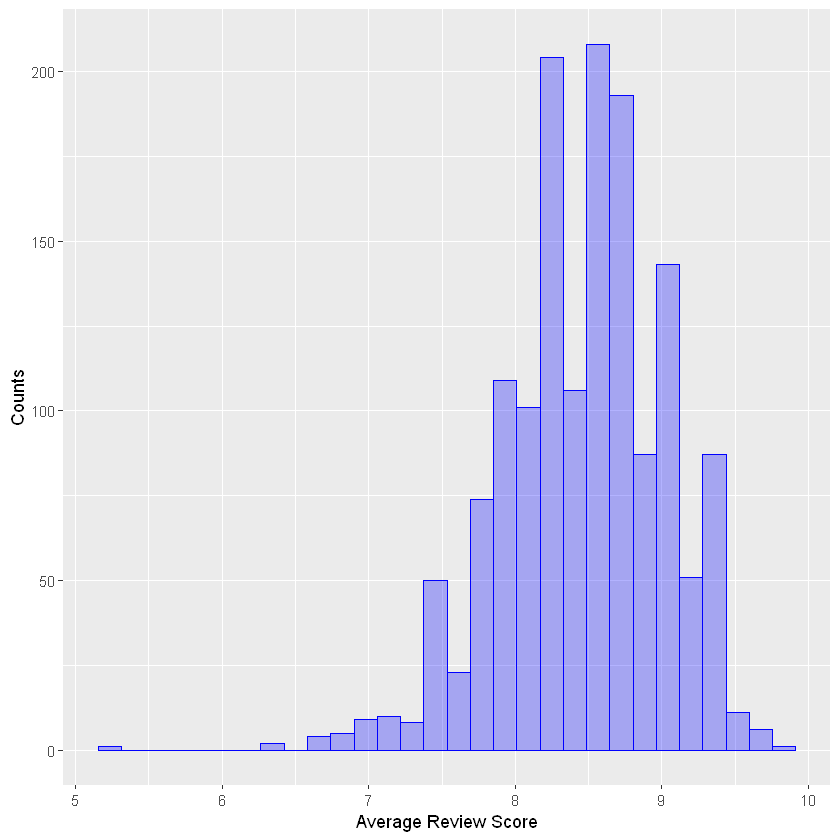

In [19]:
dataset_clean%>%select(Average_Score,Hotel_Name)%>%distinct(Average_Score,Hotel_Name)%>%ggplot(aes(x=Average_Score))+geom_histogram(color='blue',fill='blue',alpha=0.3,bins=30)+xlab("Average Review Score")+ylab("Counts")

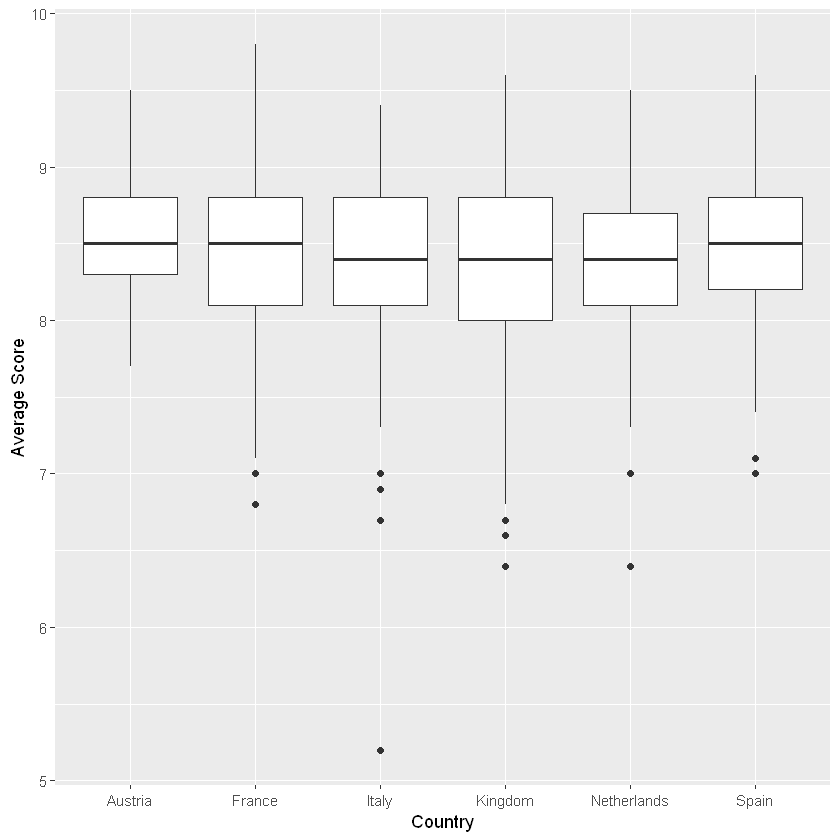

In [20]:
dataset%>%ggplot(aes(x=as.factor(Country),y=Average_Score))+geom_boxplot()+xlab("Country")+ylab("Average Score")

# Partie Floriane

Toutes les nationalités -> Valeurs trop inégales pour être lisibles
(Trouver un graphique plus adapté ?)
(Laisser pour montrer que ce pays a plus répondu au sondage que les autres ?)

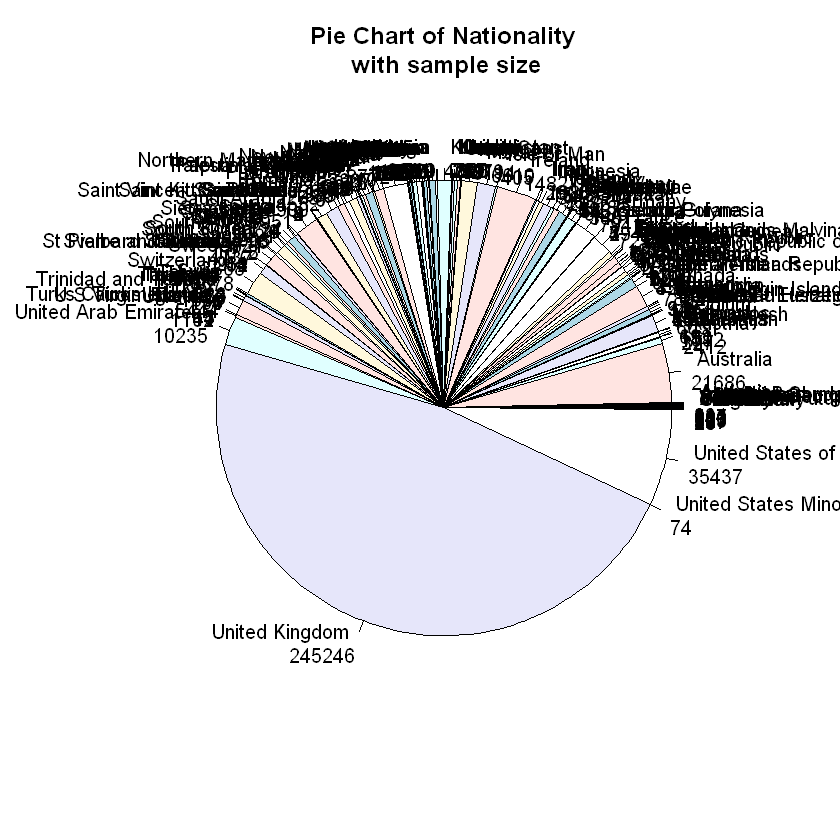

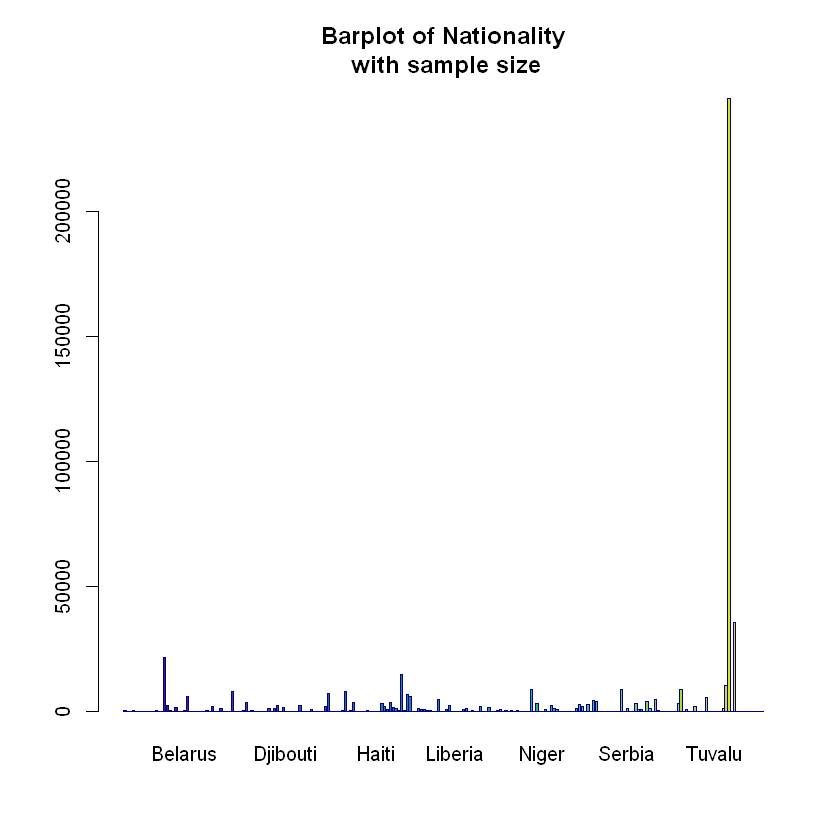

In [29]:
#PIECHART
nationalityTable <- table(dataset$Reviewer_Nationality)
pieNames <- paste(nationalityTable, sep="")
pieLabels <- paste(names(nationalityTable), "\n", nationalityTable, sep="")
pie(nationalityTable, labels = pieLabels,
    main="Pie Chart of Nationality\n with sample size")

#Barplot 
barplot(nationalityTable,
        col = viridis(length(nationalityTable)),
        border = "dark blue"
       )
title(main = "Barplot of Nationality\n with sample size")

Tous les pays -> Représenter seulement une valeur par hôtel, et non par reviewer

In [57]:
dataset_country = dataset_clean[0:2]
#print(dataset_country)

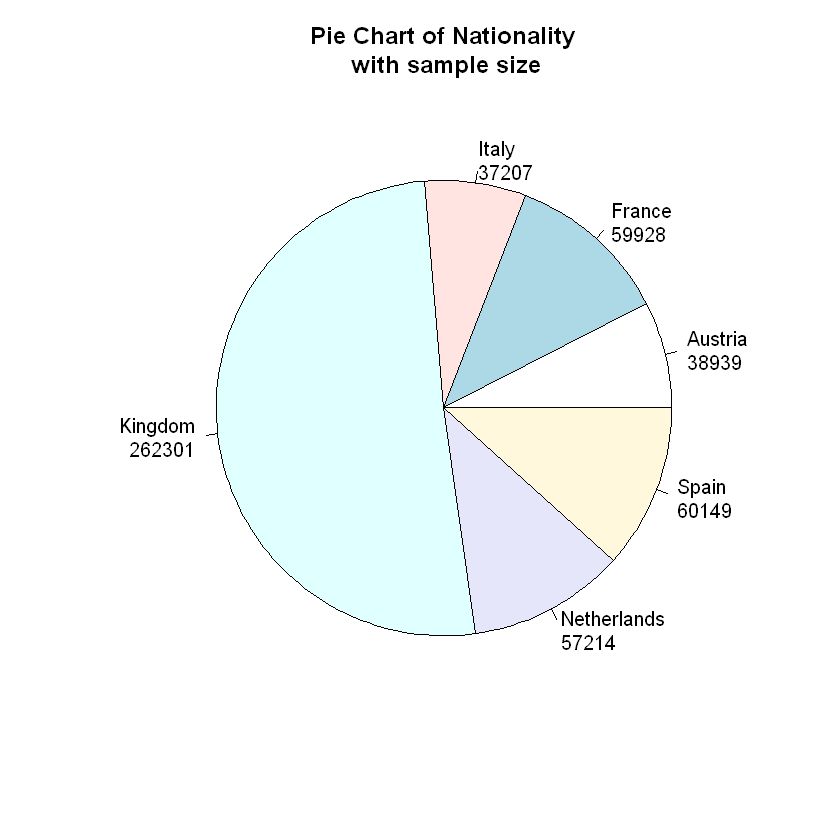

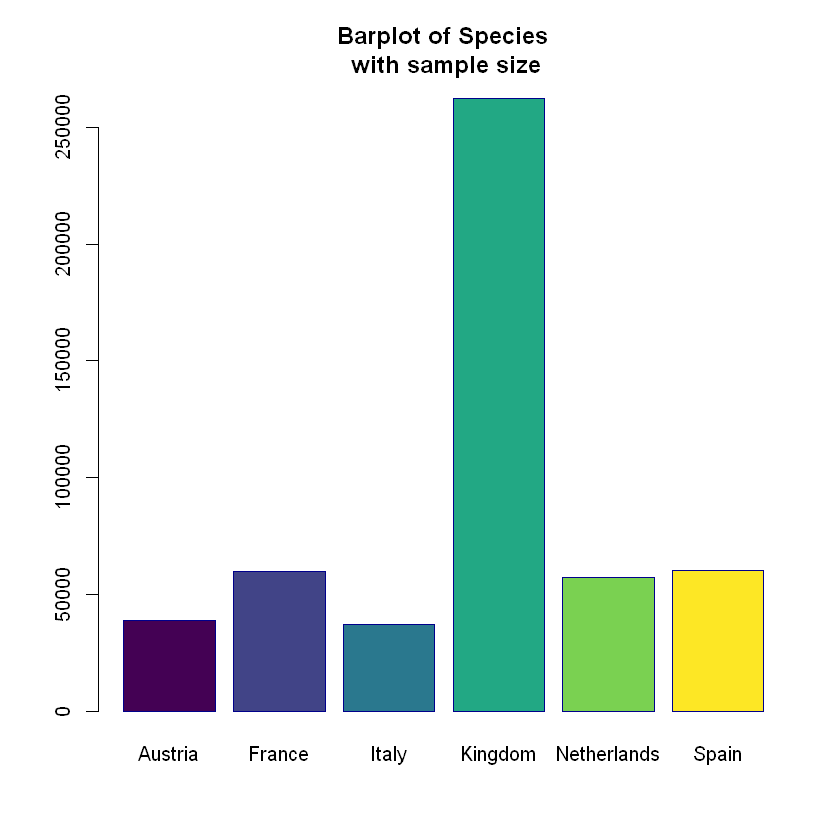

In [34]:
#PIECHART

countryTable <- table(dataset_clean$Country)
pieNames <- paste(countryTable, sep="")
pieLabels <- paste(names(countryTable), "\n", countryTable, sep="")
pie(countryTable, labels = pieLabels,
    main="Pie Chart of Nationality\n with sample size")

#Barplot 
barplot(countryTable, 
        col = viridis(length(countryTable)),
        border = "dark blue"
        )
title(main = "Barplot of Species\n with sample size")

`summarise()` has grouped output by 'Country'. You can override using the `.groups` argument.


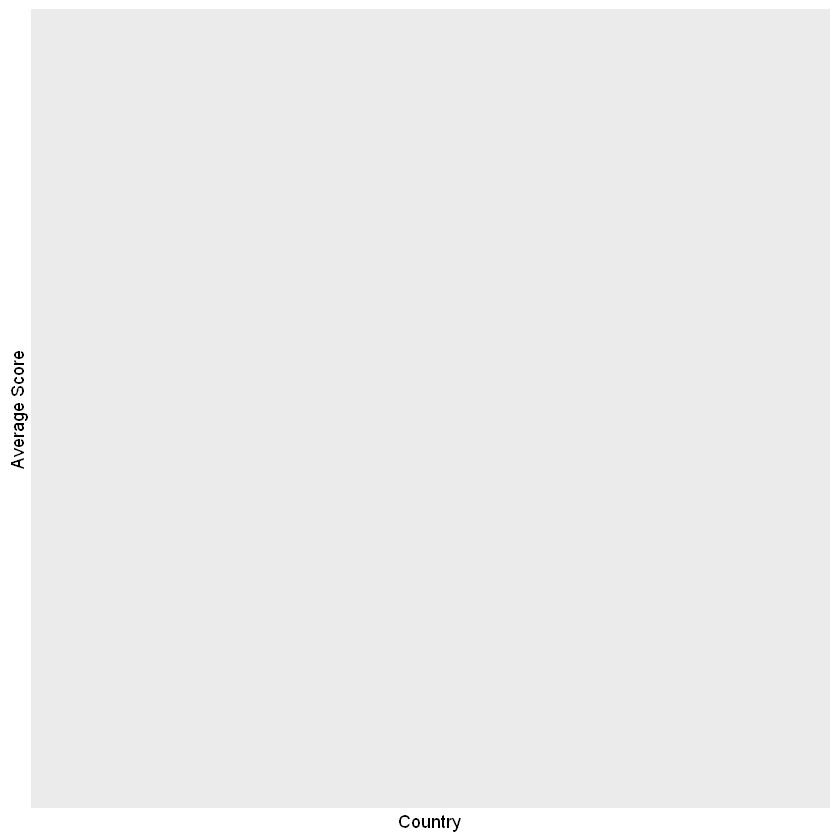

In [37]:
ind=which(is.na(dataset_clean$Reviewer_Nationality))
data_model=dataset_clean[-ind,]
data_model$tourist=ifelse(data_model$Reviewer_Nationality==data_model$Country,"Yes","No")
data_model$tourist=as.factor(data_model$tourist)
data_model%>%group_by(Country,tourist)%>%summarise(average_score=mean(Average_Score))%>%ungroup()%>%mutate(Average_Score=average_score**7)%>%ggplot(aes(x=Country,y=Average_Score,color=tourist,fill=tourist))+geom_bar(stat='identity',position='dodge')+xlab("Country")+ylab("Average Score")+scale_y_continuous(breaks = NULL)
